# FACE - MASK DETECTION USING FASTAI

In [14]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [15]:
from fastbook import *
from fastai.vision.widgets import*

In [16]:
import pathlib

In [17]:
DATASET_PATH = Path("C:/Users/Vishal/Downloads/Mask_dataset/train Dataset _ mask")

In [18]:
mask_datablock = DataBlock(
           get_items=get_image_files,
           get_y=parent_label,
           blocks=(ImageBlock, CategoryBlock), 
           item_tfms=RandomResizedCrop(224, min_scale=0.3),
           splitter=RandomSplitter(valid_pct=0.2, seed=100),
           batch_tfms=aug_transforms(mult=2)
        )

In [19]:
 #!nvidia-smi

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


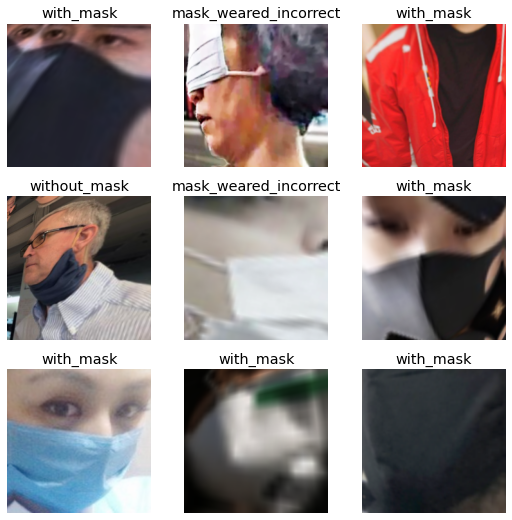

In [20]:
dls = mask_datablock.dataloaders(DATASET_PATH)
dls.show_batch()

In [21]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [22]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.821983,0.664216,0.246753,02:30


epoch,train_loss,valid_loss,error_rate,time
0,1.145522,0.565164,0.194805,02:36
1,0.999657,0.421395,0.136364,02:33
2,0.857122,0.421218,0.142857,02:47
3,0.798976,0.383355,0.123377,02:55


# Exporting the model

In [23]:
learn.export()

In [24]:
path = Path()
path.ls(file_exts ='.pkl')

(#1) [Path('export.pkl')]

# Loading the Model

In [25]:
learn_inf = load_learner(path/'export.pkl')

Prediction 

In [28]:
learn_inf.predict("C:\\Users\\Vishal\\Desktop\\test1.jpg")

('mask_weared_incorrect', tensor(0), tensor([0.9869, 0.0082, 0.0049]))

In [29]:
learn_inf.dls.vocab

['mask_weared_incorrect', 'with_mask', 'without_mask']

In [30]:
# Add Widgets to upload images & Classify them

In [31]:
upload_btn = widgets.FileUpload()

run_btn = widgets.Button(description = "Classify ")

output_btn = widgets.Output()

label_pred = widgets.Label()


def on_click_classify(change):
    img = PILImage.create(upload_btn.data[-1])
    output_btn.clear_output()
    with output_btn: display(img.to_thumb(224,224))
    pred , pred_idx,pred_prob = learn_inf.predict(img)
    label_pred.value = f'Prediction: {pred} ; Probability :{pred_prob[pred_idx]: 0.04f}'
    
run_btn.on_click(on_click_classify)

In [32]:
VBox([widgets.Label("upload image to classify !"), upload_btn , run_btn , output_btn , label_pred])
